# **Quality Check**

## **Dependencies**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Load Data Frames**

### BMZ 

In [27]:
bmz_df = pd.read_csv("../../src/transformed_bmz.csv")
bmz_df.head(2)

,iati_id,title_en,title_other,organization,country,region,location,description_en,description_other,status,...,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,sgd_goal_code,sgd_goal_name,sgd_target_code,sgd_target_name,docs
0,DE-1-201629492-0,Basic health services with focus on reducing m...,Basisgesundheitsdienste zur Senkung der Mütter...,Bundesministerium für wirtschaftliche Zusammen...,['SS'],NaN,['Juba'],Basic health services with focus on reducing m...,Basisgesundheitsdienste zur Senkung der Mütter...,Finalisation,...,2024-01-22T00:00:00Z,12230;,Basic health infrastructure;,NaN,NaN,NaN,NaN,NaN,NaN,"['https://www.bmz.de/de/laender/suedsudan', 'h..."
1,DE-1-201673854-0,Sustainable Water Sources and Livelihoods amon...,Nachhaltige Wasserversorgung und Lebensunterhalt,Bundesministerium für wirtschaftliche Zusammen...,['SS'],NaN,['Juba'],Sustainable Water Sources and Livelihoods amon...,Nachhaltige Wasserversorgung und Lebensunterha...,Finalisation,...,2024-01-22T00:00:00Z,43040;,Rural development;,NaN,NaN,NaN,NaN,NaN,NaN,"['https://www.bmz.de/de/laender/suedsudan', 'h..."


## **NaN Values**

In [71]:
columns = bmz_df.columns

orgas = {
    "BMZ": [bmz_df]
}

# extract the nan values for each orga
for i in orgas:
    df = orgas[i][0]
    df_len = len(df)
    nan_list = []
    for c in columns:
        nan_count = df[c].isna().sum() 
        non_nan_perc = round(1 - nan_count / df_len, 2)
        nan_list.append(non_nan_perc)
    orgas[i].append(nan_list)

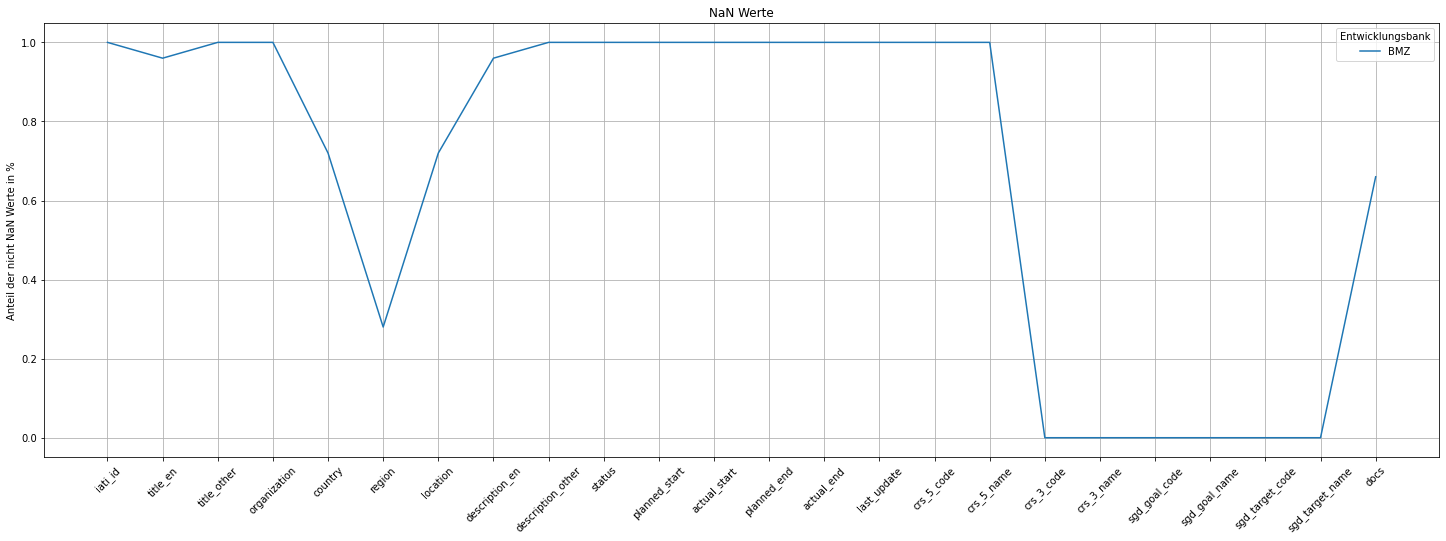

In [87]:
plt.figure(figsize=(25, 8))

for key, values in orgas.items():
    sns.lineplot(x=range(len(values[1])), y=values[1], label=key)

plt.title('NaN Werte')
#plt.xlabel('Merkmale')
plt.ylabel('Anteil der nicht NaN Werte in %')
plt.xticks(ticks=range(len(values[1])), labels=columns, rotation=45)
plt.legend(title='Entwicklungsbank')
plt.grid(True)
plt.show()